# Imports

In [2]:
import cython
import main
import main_profile
import main_profile_gpu
import numpy as np
import time
import matplotlib.pyplot as plt

# Exercise 1 - Gauss-Seidel for Poisson Solver


### Task 1.1: 
Develop the Gauss-Seidel solver with Python List, array, or NumPy. Plot the performance varying the grid size.

#### code

In [3]:
def gauss_seidel(f, num_iterations=1000):
    """
    Perform Gauss-Seidel iterations to solve the 2D Poisson equation.

    Parameters:
    - f: 2D NumPy array representing the grid.
    - num_iterations: Number of iterations to perform.

    Returns:
    - Updated 2D array after Gauss-Seidel iterations.
    """
    newf = f.copy()
    n, m = newf.shape

    for _ in range(num_iterations):
        for i in range(1, n-1):
            for j in range(1, m-1):
                newf[i, j] = 0.25 * (newf[i, j+1] + newf[i, j-1] +
                                     newf[i+1, j] + newf[i-1, j])
    return newf

def run_performance_test(grid_sizes, num_iterations=1000):
    """
    Run the Gauss-Seidel solver for different grid sizes and measure execution time.

    Parameters:
    - grid_sizes: List of grid sizes to test.
    - num_iterations: Number of iterations for Gauss-Seidel method.

    Returns:
    - Dictionary mapping grid size to execution time.
    """
    performance = {}

    for N in grid_sizes:
        print(f"Running Gauss-Seidel for grid size {N}x{N}...")
        f = np.random.rand(N, N)  # Initialize grid with random numbers
        f[0, :], f[-1, :], f[:, 0], f[:, -1] = 0, 0, 0, 0  # Set boundary conditions

        start_time = time.time()
        gauss_seidel(f, num_iterations)
        elapsed_time = time.time() - start_time

        performance[N] = elapsed_time
        print(f"Grid size {N}x{N} took {elapsed_time:.4f} seconds")

    return performance

def run_profiler():

    # Define grid sizes
    grid_sizes = [10, 20, 50, 100] # could include 200

    # Run performance test
    performance_data = run_performance_test(grid_sizes)

    # Plot performance results
    plt.figure(figsize=(8, 6))
    plt.plot(performance_data.keys(), performance_data.values(), marker='o', linestyle='-')
    plt.xlabel("Grid Size (N x N)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Gauss-Seidel Solver Performance")
    plt.grid()
    # plt.show()

#### results

In [4]:
run_profiler()

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0556 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.2764 seconds
Running Gauss-Seidel for grid size 50x50...


KeyboardInterrupt: 

### Task 1.2: 
Profile the code to identify the part of the code to optimize. You can use the tool of your choice.

In [ ]:
! python -m cProfile -s cumulative main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0667 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.3328 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 2.4630 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 9.7227 seconds
         1549551 function calls (1524816 primitive calls) in 15.619 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    828/1    0.017    0.000   15.620   15.620 {built-in method builtins.exec}
        1    0.000    0.000   15.620   15.620 main.py:1(<module>)
        1    0.001    0.001   12.614   12.614 main.py:26(run_performance_test)
        4   12.589    3.147   12.589    3.147 main.py:5(gauss_seidel)
       98    0.006    0.000    7.688    0.078 __init__.py:1(<module>)
    879/4    0.060    0.000    2.993    0.748 <frozen importlib._bootstrap>:1165(_find_and_load)
    875/4    0.009    0.000    2.99

gauss_seidl is the method which takes the longest to compute -> profile this in more detail 

In [ ]:
! python -m cProfile -o profile.stats main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0818 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.3367 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 2.4799 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 9.3827 seconds


In [ ]:
! python -m memory_profiler main.py

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0950 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.2846 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 1.9354 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 7.5143 seconds


In [ ]:
! python -m kernprof -l main.py 

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0547 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.2723 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 1.8616 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 7.3591 seconds
Wrote profile results to main.py.lprof
Inspect results with:
c:\Users\rmare\AppData\Local\Programs\Python\Python311\python.exe -m line_profiler -rmt "main.py.lprof"


In [ ]:
! python -m line_profiler -rmt "main.py.lprof"

Timer unit: 1e-06 s



### Task 1.3: 
Use the Cython Annotation tool to identify the parts to use Cython

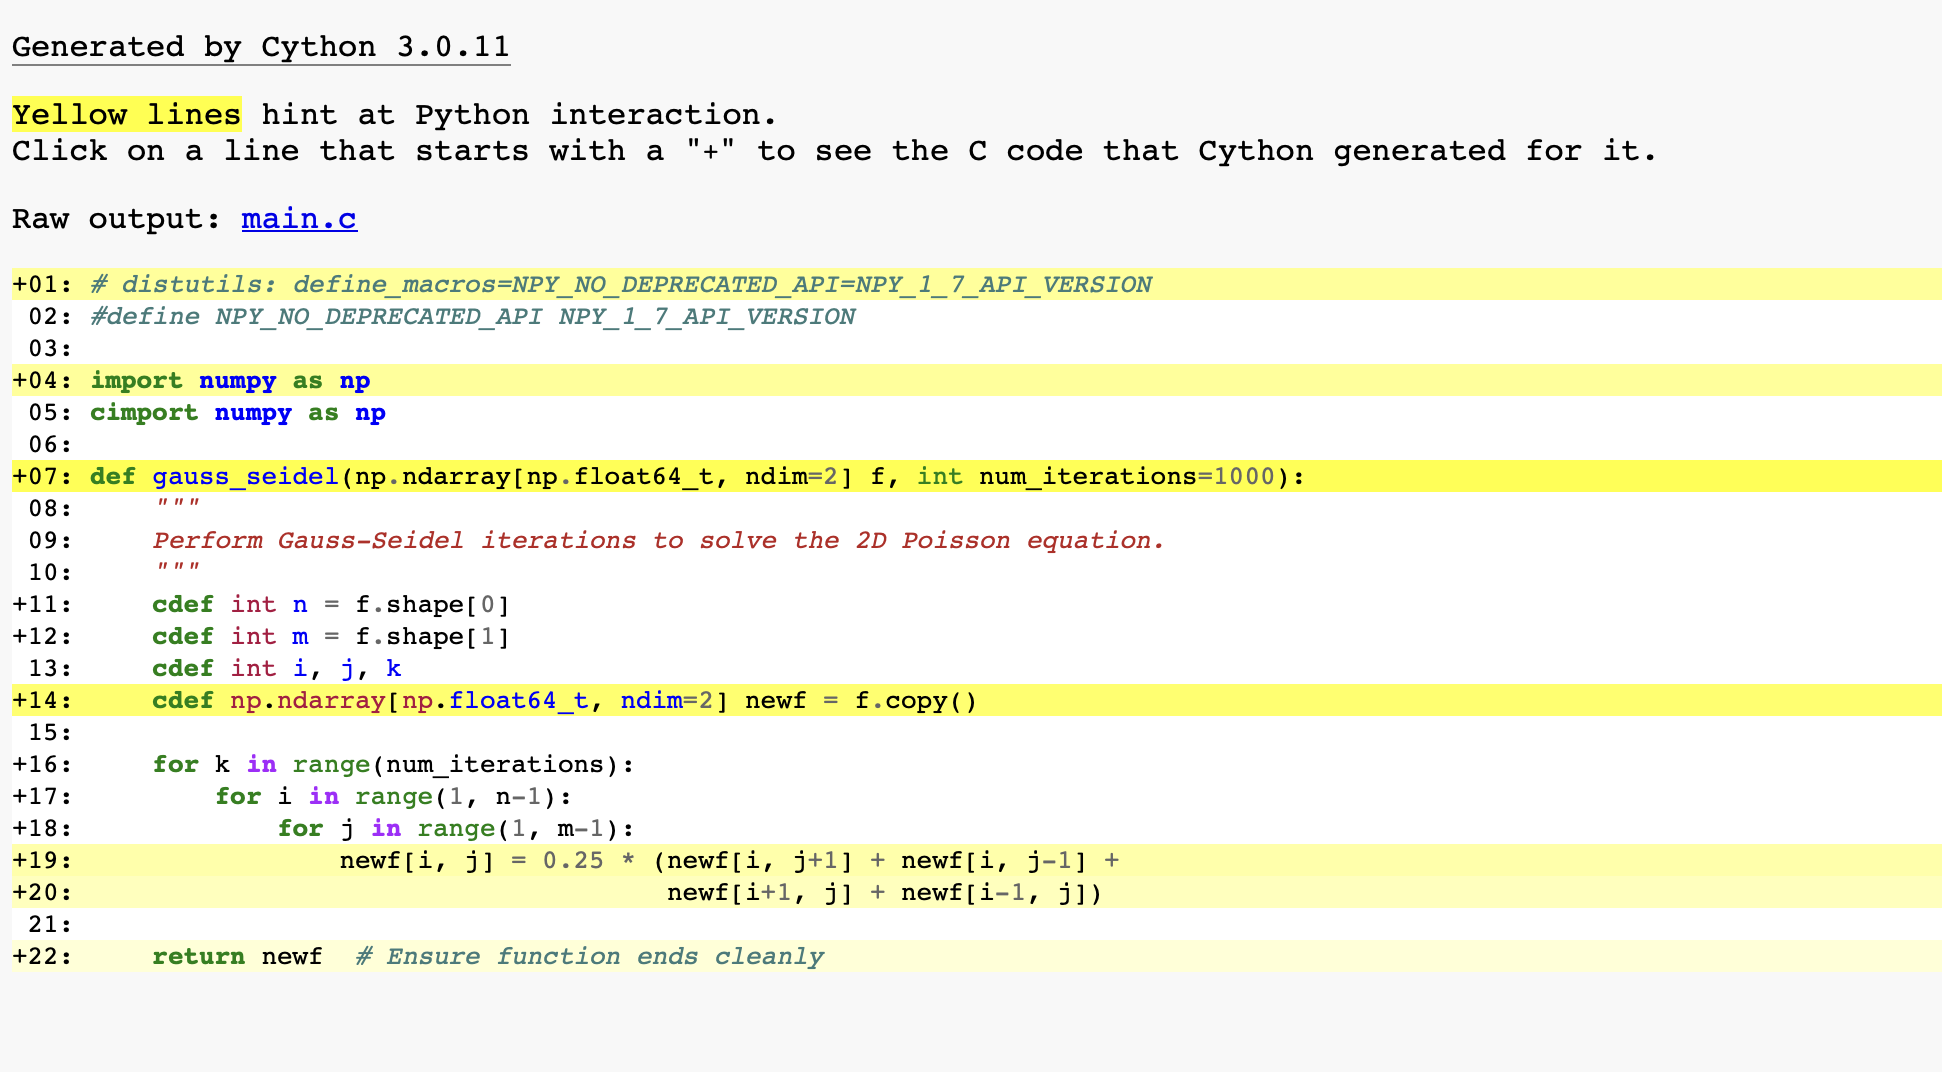

In [ ]:
! python setup.py build_ext --inplace

Compiling cythonfn.pyx because it changed.
[1/1] Cythonizing cythonfn.pyx
running build_ext
building 'cythonfn' extension
"C:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools\VC\Tools\MSVC\14.29.30133\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -Ic:\Users\rmare\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\include -Ic:\Users\rmare\AppData\Local\Programs\Python\Python311\include -Ic:\Users\rmare\AppData\Local\Programs\Python\Python311\Include "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools\VC\Tools\MSVC\14.29.30133\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\um" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\winrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\cppwinrt" /Tccytho

In [ ]:
! dir -l main.html

 Volume in drive C is Windows-SSD
 Volume Serial Number is 4EDC-9788

 Directory of c:\Users\rmare\OneDrive\Desktop\HPC_1\Compilation_GPU_for_optimization


 Directory of c:\Users\rmare\OneDrive\Desktop\HPC_1\Compilation_GPU_for_optimization

10-Feb-25  01:28 PM            46,274 main.html
               1 File(s)         46,274 bytes
               0 Dir(s)  155,627,757,568 bytes free


In [ ]:
! open main.html

'open' is not recognized as an internal or external command,
operable program or batch file.


# Task 1.4

Cython optimization and comparison with Task 1.1

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0000 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.0030 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 0.0152 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 0.0619 seconds


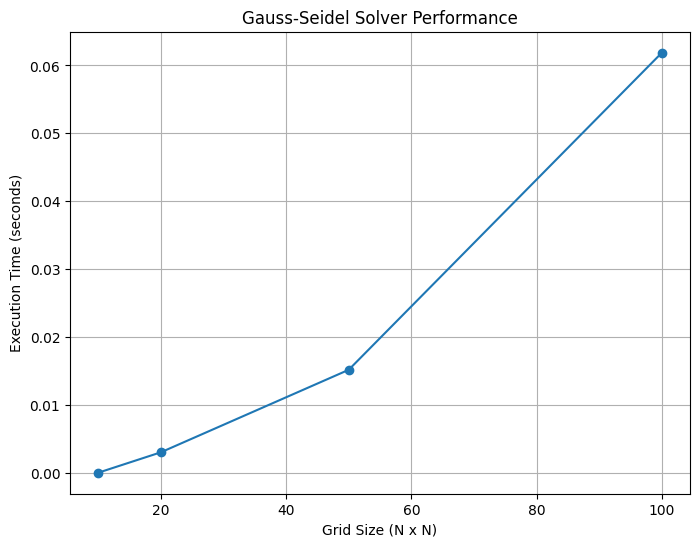

In [ ]:
grid_sizes = [10, 20, 50, 100]
main_profile.run_profile()

### Results Comparison
|size| original (sec) | compiled (sec) | difference (sec)|
|----|----------|----------|----------------------------|
|10x10|0.0569|0.0000|0.0569|
|20x20|0.2441|0.0030|0.2411|
|50x50|1.9043|0.0152|1.8891|
|100x100|7.9417|0.0619|7.8798|

The compiled version is significantly faster, and the benefits increase with larger problem size.

# Task 1.5
port your code to Nvidia GPUs. Express 2 nested loop operations as NumPy roll operations

TODO: WRITE SOMETHING

Running Gauss-Seidel for grid size 10x10...
Grid size 10x10 took 0.0541 seconds
Running Gauss-Seidel for grid size 20x20...
Grid size 20x20 took 0.0561 seconds
Running Gauss-Seidel for grid size 50x50...
Grid size 50x50 took 0.0597 seconds
Running Gauss-Seidel for grid size 100x100...
Grid size 100x100 took 0.0641 seconds


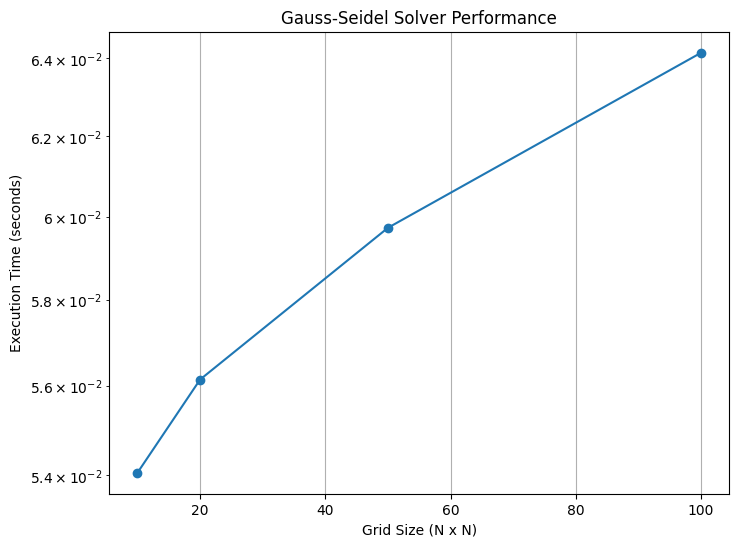

In [1]:
import main_profile_gpu
main_profile_gpu.run_profile()

# Task 1.6 
use CuPy to port code to Nvidia GPUs

In [1]:
import main_profile_gpu
main_profile_gpu.run_profile()

c:\Users\rmare\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


Running Gauss-Seidel for grid size 10x10...


AttributeError: 'ndarray' object has no attribute 'clone'

# Task 1.7
Measure performance with GPU and make a plot of the execution time verying the size of the grid. Compare and comment on the performance differences

# Task 1.8 
Save the newgrid matrix as an hdf5 file using h5py

# Bonus Exercise - Fast Fractal Fun with Cython and GPUs